In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('feature_importance/merged_feature_importance.csv', index_col=0)
df = df.dropna(axis=1, how='any')
df

,ml_algorithm,forecasting_algorithm,run,feature_importance_method,value__has_duplicate_max,value__mean_second_derivative_central,value__median,value__length,value__standard_deviation,value__skewness,...,value__energy_ratio_by_chunks__num_segments_10__segment_focus_5,value__energy_ratio_by_chunks__num_segments_10__segment_focus_6,value__ratio_beyond_r_sigma__r_0.5,value__ratio_beyond_r_sigma__r_1,value__ratio_beyond_r_sigma__r_1.5,value__ratio_beyond_r_sigma__r_2.5,value__ratio_beyond_r_sigma__r_3,value__ratio_beyond_r_sigma__r_6,value__lempel_ziv_complexity__bins_2,value__permutation_entropy__dimension_3__tau_1
0,M4XGBRegressor,sNaive,1,shap,0.000431,0.005533,0.023753,0.006384,0.010115,0.003775,...,0.000949,0.001852,0.000643,0.001789,0.000743,0.002991,0.001091,0.000414,0.002170,0.003736
1,M4RandomForestRegressor,Theta,8,shap,0.000347,0.001800,0.011902,0.003088,0.004329,0.000698,...,0.001627,0.002094,0.000511,0.000495,0.000725,0.000965,0.000497,0.000309,0.001018,0.002485
2,M4XGBRegressor,Com,4,shap,0.000291,0.004878,0.017071,0.004394,0.010111,0.003379,...,0.001531,0.002283,0.000903,0.001284,0.000873,0.001063,0.001008,0.000303,0.001560,0.005813
3,M4XGBRegressor,Naive2,10,shap,0.000375,0.006024,0.019757,0.008130,0.012516,0.002340,...,0.001049,0.002488,0.000642,0.001046,0.001093,0.000624,0.000661,0.000348,0.003636,0.003841
4,M4XGBRegressor,ARIMA,5,shap,0.000315,0.005245,0.016926,0.003113,0.010095,0.003238,...,0.001376,0.002382,0.001086,0.000994,0.000613,0.001100,0.001116,0.000364,0.001932,0.004737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11760,M4KerasNetRegressionModel,245,10,shap,0.001118,0.002134,0.038423,0.005418,0.046333,0.005980,...,0.002048,0.002429,0.001749,0.001729,0.001799,0.003011,0.001421,0.000998,0.005938,0.009781
11761,M4DummyMeanRegression,Damped,7,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11762,M4DummyMeanRegression,Naive2,7,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
11763,M4KerasNetRegressionModel,237,8,shap,0.001054,0.002133,0.037445,0.009100,0.046570,0.005739,...,0.002675,0.002696,0.002705,0.001724,0.001636,0.002586,0.001500,0.000661,0.007869,0.009387


In [3]:
static_columns = ['feature_importance_method', 'forecasting_algorithm', 'ml_algorithm', 'run']
feature_columns = set(df.columns) - set(static_columns)
feature_columns = sorted(list(feature_columns))

In [4]:
figures_directory = 'figures'
show_top_n_features = 10

In [5]:
from collections import defaultdict
features_ranking = defaultdict(lambda: 0)

for irow in range(len(df)):
    s = df[feature_columns].iloc[irow]
    i=0
    for fi, fn in sorted(list(zip(s,s.index))):
        features_ranking[fn] += i
        i+=1
    
best_features_list = list(features_ranking.items())
best_features_list.sort(key=lambda x:x[1], reverse=True)
best_features = [x for x, y in best_features_list]
best_features = best_features[:show_top_n_features]

In [6]:
df['feature_importance_method'].unique()

array(['shap', 'permutation', 'xgboost-weight', 'randomforest',
       'xgboost-total_gain', 'xgboost-gain', 'xgboost-cover',
       'xgboost-total_cover'], dtype=object)

In [7]:
mdf = df.melt(id_vars=['feature_importance_method', 'forecasting_algorithm', 'ml_algorithm', 'run'], var_name="feature", value_name="importance")

In [8]:
mdf

,feature_importance_method,forecasting_algorithm,ml_algorithm,run,feature,importance
0,shap,sNaive,M4XGBRegressor,1,value__has_duplicate_max,0.000431
1,shap,Theta,M4RandomForestRegressor,8,value__has_duplicate_max,0.000347
2,shap,Com,M4XGBRegressor,4,value__has_duplicate_max,0.000291
3,shap,Naive2,M4XGBRegressor,10,value__has_duplicate_max,0.000375
4,shap,ARIMA,M4XGBRegressor,5,value__has_duplicate_max,0.000315
...,...,...,...,...,...,...
741190,shap,245,M4KerasNetRegressionModel,10,value__permutation_entropy__dimension_3__tau_1,0.009781
741191,shap,Damped,M4DummyMeanRegression,7,value__permutation_entropy__dimension_3__tau_1,0.000000
741192,shap,Naive2,M4DummyMeanRegression,7,value__permutation_entropy__dimension_3__tau_1,0.000000
741193,shap,237,M4KerasNetRegressionModel,8,value__permutation_entropy__dimension_3__tau_1,0.009387


In [9]:
mdf['ml_algorithm'].unique()

array(['M4XGBRegressor', 'M4RandomForestRegressor',
       'M4KerasNetRegressionModel', 'M4DummyMeanRegression',
       'M4RandomForestSingleOutputRegressor'], dtype=object)

In [10]:
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 20))


#best_features = mdf.groupby('feature').agg({'importance': lambda c: c.abs().sum()}).reset_index().sort_values(by='importance', ascending=False)['feature'].to_list()[:show_top_n_features]

In [11]:
algos = ['118', '245', '237', '72', '69', '36', '78', '260', '238', '39', '5', '132', '251', '250', '243', '235', '104', 'Theta', 'Com', 'ARIMA', '223', 'Damped', 'ETS', '239', '211', '231', '227', '82', '212', '236', '248', '30', 'Holt', 'SES', '234', '24', 'Naive2', '218', '106', '43', 'Naive', '216', 'sNaive', '169', '241', '191', '126', '244', '70', '249', '252', '255', '9', '256', '253', '91', 'RNN', '219', 'MLP', '225', '258']

In [12]:
mdfr = mdf
mdfr = mdfr[mdfr['forecasting_algorithm'].isin(algos[:5])]
mdfr = mdfr[mdfr['feature'].isin(best_features)]
mdfr = mdfr[mdfr['feature_importance_method']=='permutation']

In [13]:
figures_directory = 'figures'
xlim = [-0.02, 0.06]

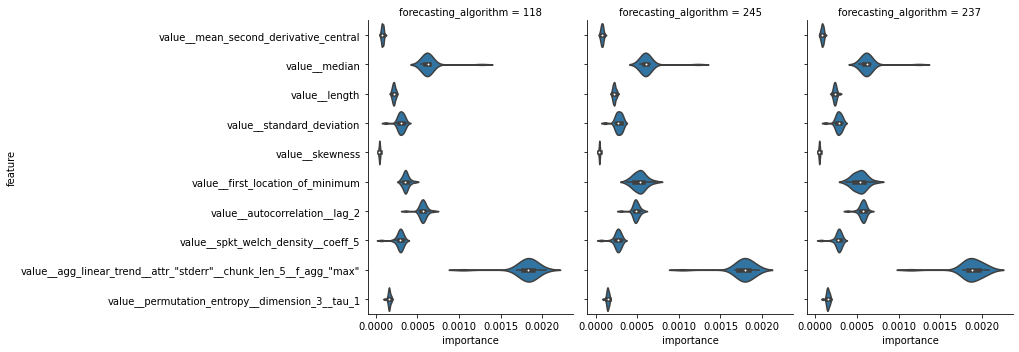

In [14]:
ml_algo = 'M4RandomForestRegressor'
g = sns.catplot(x="importance", y="feature", hue="feature_importance_method", col="forecasting_algorithm", data=mdfr[mdfr['ml_algorithm']==ml_algo], kind="violin")
g._legend.remove()
#plt.xlim(xlim)
plt.savefig(f'{figures_directory}/feature_importance_detail_{ml_algo}_permutation.pdf', bbox_inches='tight', pad_inches=0)

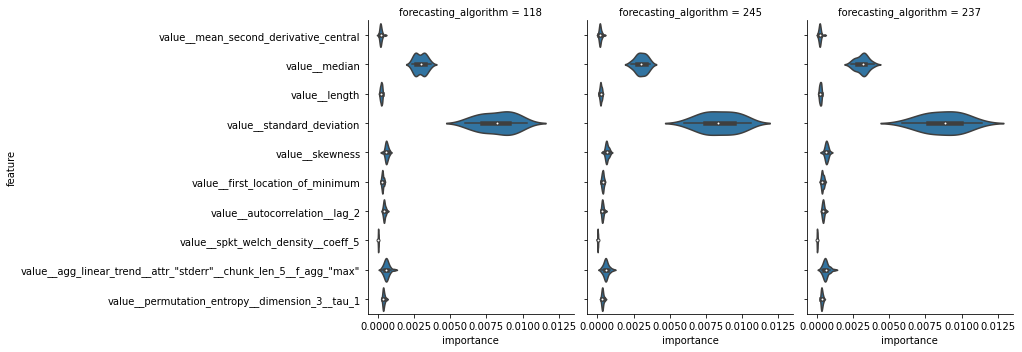

In [15]:
ml_algo = 'M4KerasNetRegressionModel'
g = sns.catplot(x="importance", y="feature", hue="feature_importance_method", col="forecasting_algorithm", data=mdfr[mdfr['ml_algorithm']==ml_algo], kind="violin")
g._legend.remove()
#plt.xlim(xlim)
plt.savefig(f'{figures_directory}/feature_importance_detail_{ml_algo}_permutation.pdf', bbox_inches='tight', pad_inches=0)

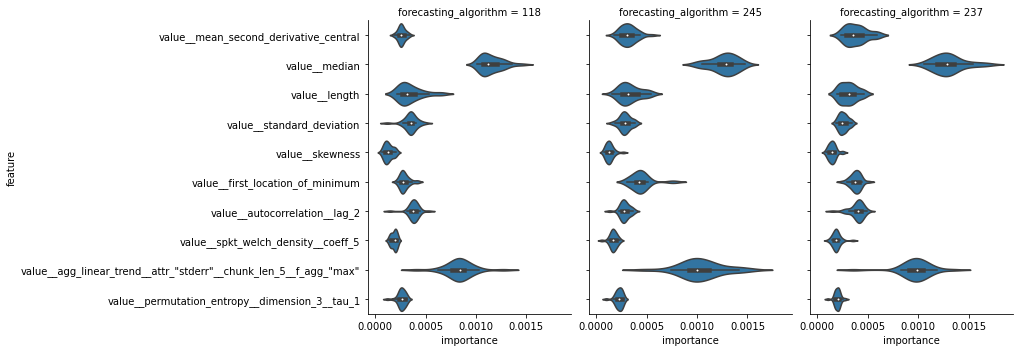

In [16]:
ml_algo = 'M4XGBRegressor'
g = sns.catplot(x="importance", y="feature", hue="feature_importance_method", col="forecasting_algorithm", data=mdfr[mdfr['ml_algorithm']==ml_algo], kind="violin")
g._legend.remove()
#plt.xlim(xlim)
plt.savefig(f'{figures_directory}/feature_importance_detail_{ml_algo}_permutation.pdf', bbox_inches='tight', pad_inches=0)

In [17]:
mdfr = mdf
mdfr = mdfr[mdfr['forecasting_algorithm'].isin(['Naive', 'MLP', 'RNN', '118', '211'])]
mdfr = mdfr[mdfr['feature'].isin(best_features)]
mdfr = mdfr[mdfr['feature_importance_method']=='shap']

In [18]:
figures_directory = 'figures'
xlim = [-0.02, 0.06]

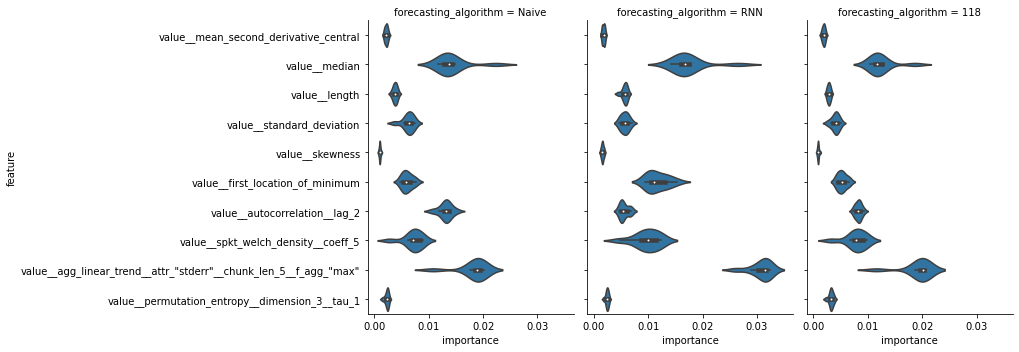

In [19]:
ml_algo = 'M4RandomForestRegressor'
g = sns.catplot(x="importance", y="feature", hue="feature_importance_method", col="forecasting_algorithm", data=mdfr[mdfr['ml_algorithm']==ml_algo], kind="violin")
g._legend.remove()
#plt.xlim(xlim)
plt.savefig(f'{figures_directory}/feature_importance_detail_{ml_algo}_shap.pdf', bbox_inches='tight', pad_inches=0)

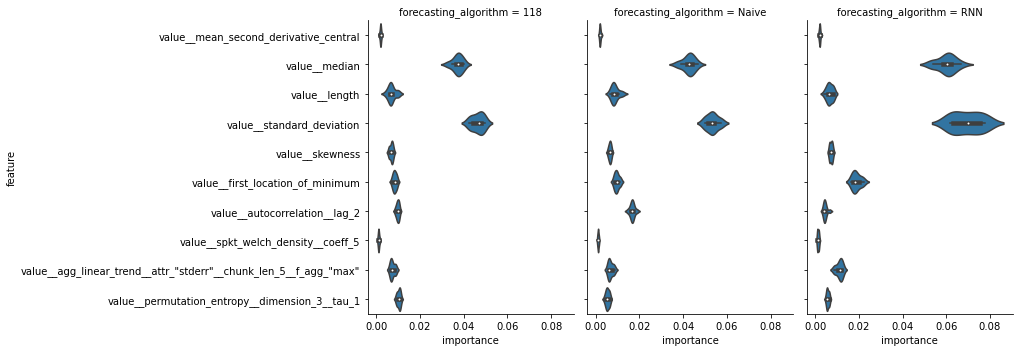

In [20]:
ml_algo = 'M4KerasNetRegressionModel'
g = sns.catplot(x="importance", y="feature", hue="feature_importance_method", col="forecasting_algorithm", data=mdfr[mdfr['ml_algorithm']==ml_algo], kind="violin")
g._legend.remove()
#plt.xlim(xlim)
plt.savefig(f'{figures_directory}/feature_importance_detail_{ml_algo}_shap.pdf', bbox_inches='tight', pad_inches=0)

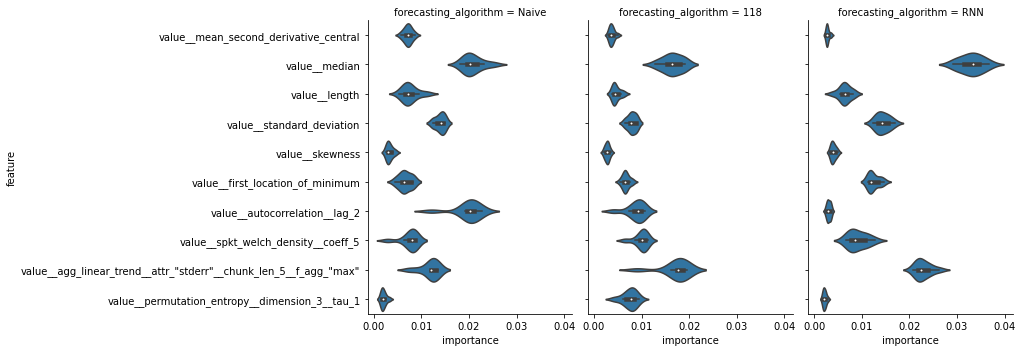

In [21]:
ml_algo = 'M4XGBRegressor'
g = sns.catplot(x="importance", y="feature", hue="feature_importance_method", col="forecasting_algorithm", data=mdfr[mdfr['ml_algorithm']==ml_algo], kind="violin")
g._legend.remove()
#plt.xlim(xlim)
plt.savefig(f'{figures_directory}/feature_importance_detail_{ml_algo}_shap.pdf', bbox_inches='tight', pad_inches=0)